# This notebook is for Project assignment in Electromagnetic Class at Kasetsart University.  
Information in this notebook will be updated later.  
Students will need to fork the notebook and add more explanation and plot distribution of electric potential and electric field. Find capacitance values.  
Some of this notebook will be written in Thai.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.constants
import math
eps0 = scipy.constants.epsilon_0
pi = scipy.constants.pi
e = scipy.constants.elementary_charge
G = scipy.constants.gravitational_constant
m_e = scipy.constants.m_e
m_p = scipy.constants.m_p
k=1/(4*pi*eps0)


# def potential(xo,yo,delx,x,y):  
<img   src="http://raw.githubusercontent.com/githubdcw/imagesforkagle/main/0120521720202/twodimensionstrip.jpg" width=500>  
Function returns the potential at point $(x,y)$ produced by a infinite strip of charge $ 1 \text{C/m}^2 $ parallel to $ xz $ plane centered at $ (x_o,y_o) $ with the width of $ \Delta x $, where zero volt is at (0,0).  
The result is derived by integrating the solution of a single line charge. It involves integrating $ \int {\ln\left(x^2+a^2\right)} dx $. The integral can be found from https://www.integral-calculator.com/. $ \int {\ln\left(x^2+a^2\right)} dx = \ln\left(x^2+a^2\right)- 2x +2a\arctan\left(\dfrac{x}{a}\right)+C $

In [2]:
def potential(xo,yo,delx,x,y):
    #return the potential at point (x,y) produced by a infinite strip of charge 1 c/m^2
    #parallel to xz plane centered at (xo,yo) with the width of delx
    k=1/(4*pi*eps0)
    xl = xo - delx/2
    xr = xo + delx/2
    tmp1 = xr*math.log(xr**2+yo**2) - xl*math.log(xl**2+yo**2) \
    + 2*abs(yo)*(math.atan(xr/abs(yo))-math.atan(xl/abs(yo))) - 2*delx 
    if y == yo:        
        if (xr-x) == 0:
            tmp2 = -2 * ((xl-x) * math.log(abs(xl-x)) + delx)
        elif (xl-x) == 0:
            tmp2 = 2 * ((xr-x)*math.log(abs(xr-x)) - delx)
        else:
            tmp2 = 2 * ((xr-x)*math.log(abs(xr-x)) - (xl-x)*math.log(abs(xl-x)) - delx)
    else:
        tmp2 = (xr-x)*math.log((xr-x)**2+(yo-y)**2) - (xl-x)*math.log((xl-x)**2+(yo-y)**2) \
        + 2*abs(yo-y)*(math.atan((xr-x)/abs(yo-y))-math.atan((xl-x)/abs(yo-y))) - 2*delx
    return k*(tmp1 - tmp2)

# ตัวอย่างการใช้ def potential  
ให้แผ่นตัวนำกว้าง 0.25 มีจุดกึงกลางอยู่ที่ (-0.75, -0.05) มี $ \rho_s$ = 1 $C/m^2$  
หมายเหตุ 0 Volt อยู่ที่จุด (0, 0)


In [3]:
print('Potentail at (-0.75, -0.05) is ', potential(-0.75, -0.05,0.25,-0.75, -0.05),'Volts')
print('Potentail at (-0.5 , -0.05) is ', potential(-0.75, -0.05,0.25,-0.5 , -0.05),'Volts')
print('Potentail at (-0.25, -0.05) is ', potential(-0.75, -0.05,0.25,-0.25, -0.05),'Volts')
print('Potentail at ( 0   , -0.05) is ', potential(-0.75, -0.05,0.25, 0   , -0.05),'Volts')
print('Potentail at ( 0.25, -0.05) is ', potential(-0.75, -0.05,0.25, 0.25, -0.05),'Volts')
print('Potentail at ( 0.5 , -0.05) is ', potential(-0.75, -0.05,0.25, 0.5 , -0.05),'Volts')
print('Potentail at ( 0.75, -0.05) is ', potential(-0.75, -0.05,0.25, 0.75, -0.05),'Volts')

Potentail at (-0.75, -0.05) is  12534808385.774582 Volts
Potentail at (-0.5 , -0.05) is  5129432252.760171 Volts
Potentail at (-0.25, -0.05) is  1859051275.7512753 Volts
Potentail at ( 0   , -0.05) is  10247195.300056469 Volts
Potentail at ( 0.25, -0.05) is  -1291753978.7996442 Volts
Potentail at ( 0.5 , -0.05) is  -2298756697.046302 Volts
Potentail at ( 0.75, -0.05) is  -3120369116.133925 Volts


# Things which students could do.  
1. เขียนอธิบายที่มาของ def potential จากความรู้ในบทที่ 2 กับ 4
1. เขียน def หาสนามไฟฟ้า  
    โดยหาจากบทที่ 2 Coulomb's Law  
    โดยหาจากบทที่ 4 $ \mathbf E  = - \nabla V $   โดยประมาณการ $ \frac {\partial V}{\partial x}$ ด้วย $ \frac {\Delta V}{\Delta x}$ 
    
1. อธิบายตัวอย่าง parallel plate capacitance ให้ดีขึ้น plotให้สวยขึ้น เช่น ใส่ grid ใส่ xlabel ylabel title
1. หาค่าความเก็บประจุของ parallel plate capacitance ลองเทียบกับค่าที่ได้จากสูตรของแผ่นใหย๋เป็นอนันต์ 
1. เขียน def หาค่าความเก็บประจุแบบต่าง
1. plot การกระจายตัวของศักย์ไฟฟ้า
1. plot การกระจายตัวของสนามไฟฟ้า
1. Compare with the solution obtained by approximate a strip of charge with a line charge
1. นิสิตอาจลองเอา def potential ไปแก้ไขให้ใช้ได้กับแผ่นประจุที่หมุนอยู่อย่างไรก็ได้ โดยใส่ agument เพิ่มเป็น $ \hat{a}_n = u_x  \hat{a}_x + u_y  \hat{a}_y + u_z \hat{a}_z $ หรือ vector ตั้งฉากกับแผ่นประจุ โดยอาจให้ใส่เป็น tuple (ux,uy,uz)   
`def potential(xo,yo,delx,x,y,(ux,uy,uz):`  
เช่น potential(xo,yo,delx,x,y,(0,1,0) จะให้ผลเหมือนกับอันที่ผมเขียน    
 potential(xo,yo,delx,x,y,(1,0,0) แผ่นตัวนำจะขนานกับระนาบ yz  
สามารถแก้ไขเพี่ยงแค่หมุนแกนครับ


# ตัวอย่าง Parallel Plate Capacitance  
สามารถทำเพิ่มเติมจาก code ที่เขียนให้ได้  
<img   src="https://raw.githubusercontent.com/githubdcw/imagesforkagle/main/0120521720202/twodimensionparallelplatecapacitance.jpg" width=500>  


ให้ความกว้าง W = 2 d = 0.1 แบ่งแผ่านโลหะสีแดงแต่ละแผ่นเป็น 8 ส่วน (nx)

In [4]:
W = 2
d = 0.1
nx = 8
dx = W/nx
xx = np.linspace(-(W/2-dx/2), (W/2-dx/2), nx)
yy = np.array([-d/2, d/2])
xx1, yy1 = np.meshgrid(xx,yy)
m,n = xx1.shape
xy1 = []
#ตำแหน่งจุด x,y เป็นจุดกึ่งกลางของแต่ละชิ้นขอแผ่นตัวนำ เมื่อแบ่งแผ่นตัวนำเป็น nx ชิ้น
for ii in range(m):
    for jj in range(n):
        xy1.append([xx1[ii,jj],yy1[ii,jj]])
print('จะได้กึ่งกลางของแต่ละชิ้นขอแผ่นตัวนำดังนี้')
print(xy1)

จะได้กึ่งกลางของแต่ละชิ้นขอแผ่นตัวนำดังนี้
[[-0.875, -0.05], [-0.625, -0.05], [-0.375, -0.05], [-0.125, -0.05], [0.125, -0.05], [0.375, -0.05], [0.625, -0.05], [0.875, -0.05], [-0.875, 0.05], [-0.625, 0.05], [-0.375, 0.05], [-0.125, 0.05], [0.125, 0.05], [0.375, 0.05], [0.625, 0.05], [0.875, 0.05]]


# คำนวน potential บนโลหะทุกชิ้น ที่เกิดจากประจุที่อยู่บนโลหะแต่ละชิ้น  
ให้ z[jj,ii] เป็น potential ที่ตัวนำชิ้นที่ ่่jj ที่เกิดจาก $ \rho_s$ = 1 $C/m^2$ บนตัวนำชิ้นที่ ii หรือ  
z[jj,ii] = potential(xy1[ii][0],xy1[ii][1],dx,xy1[jj][0],xy1[jj][1])

In [5]:
n = m*n
z = np.zeros((n,n))
#คำนวนศักย์ไฟฟ้าที่ตำแหน่งจุดกึ่งกลางของแต่ละชิ้น
for ii in range(n):
    for jj in range(n):
        z[jj,ii] = potential(xy1[ii][0],xy1[ii][1],dx,xy1[jj][0],xy1[jj][1])

# หาศักย์ไฟฟ้าบนชิ้นต่างๆ   
หาศักย์ไฟฟ้าบนชิ้นต่างๆ โดยบวกศักย์ไฟฟ้าที่เกิดจากประจุ $ \rho_s$ = 1 $C/m^2$  บนแต่ละแผ่นเข้าด้วยกัน
เช่น ศักย์ไฟฟ้าบนชิ้นที่ 1 คือ $ \sum_{ii=0}^{ii=n-1} z[1,ii] $  
หาได้โดยใช้ sum() หรือ บวกกันใน loop



# หาศักย์ไฟฟ้าบนชิ้นที่ 0 
Find potential on the $ 0^{th} $ piece.  
สามารถทำได้ในลักษณะเดียวกัน คือ $ \sum_{ii=0}^{ii=n-1} z[0,ii] $  

In [6]:
# หา V0 โดย
V0 = z[0,:].sum()
print('วิธีที่ 1: V0 = ', V0)
#หรือ
V0 = 0
for ii in range(len(z[1,:])):
    V0 = V0 + z[0,ii]
print('วิธีที่ 2: V0 = ', V0)

วิธีที่ 1: V0 =  -32412689224.59904
วิธีที่ 2: V0 =  -32412689224.599037


# หาศักย์ไฟฟ้าบนชิ้นที่ 1   
Find potential on the $ 1^{st} $ piece.  
สามารถทำได้ในลักษณะเดียวกัน คือ $ \sum_{ii=0}^{ii=n-1} z[1,ii] $  

In [7]:
V1 = 0
for ii in range(len(z[1,:])):
    V1 = V1 + z[1,ii]
print(V1)

-14937702158.56939


V0 และ V1 ที่หาได้เกิดจาก ประจุทุกตัวบนชิ้นตัวนำมีค่าคงที่เท่ากับ  $ \rho_s$ = 1 $C/m^2$ ซึ่งจะเห็นว่า V0 ไม่เท่ากับ V1 แต่เนื่องจาก จุดที่ 0 และ 1 อยู่บนโลหะแผ่นเดียวกันต้องมีศักย์ไฟฟ้าเท่ากันจึงทำให้รู้ว่า $ \rho_s$ บนโลหะแต่ละชิ้นจะไม่เท่ากันซึ่งเราต้องหาว่า $ \rho_s$ ที่แต่ละแผ่นมีค่าเท่าใดจึงทำให้แผ่นโลหะทั้งแผ่นมีศักย์ไฟฟ้าคงที่เท่ากันทั้งแผ่น เช่นให้ศักย์ไฟฟ้าเท่ากับ -5 V ที่แผ่น y = -0.05  
ให้ $ \rho_{sii}$ หรือ rhos[ii] เป็นประจุบนชิ้นที่ ii  
V0 = -5 = $ \sum_{ii=0}^{ii=n-1} rhos[ii] \times z[0,ii] $  
V1 = -5 = $ \sum_{ii=0}^{ii=n-1} rhos[ii] \times z[1,ii] $  
จากรูปแผ่น y = 0.05 มี 8 ชิ้น และ แผ่น y = -0.05 มี 8 ชิ้น รวม 16 ชิ้น  
จะมี $ \rho_{s}$ 16 ค่าหรือ len(rhos) = 16  
V0-V7 เป็นแผ่น y = -0.05 เท่ากับ 5 V  
V8-V15 เป็นแผ่น y = 0.05 เท่ากับ -5 V  
จะได้ว่า  
V8 = 5 = $ \sum_{ii=0}^{ii=n-1} rhos[ii] \times z[8,ii] $  


In [8]:
#ลองใส่ค่า rhos มั่วๆ
import random
rhos = [random.randint(1, 10)]
for ii in range(15):
    rhos.append(random.randint(1, 10))
rhos = np.array(rhos)
print(rhos)

[ 5  7  1  5  6  2 10  6  5  5 10 10  7  9  3  4]


In [9]:
#คำนวน V0
V0 = 0
for ii in range(len(z[0,:])):
    V0 = V0 + rhos[ii]*z[0,ii]
print('V0 = ',V0)

V1 = 0
for ii in range(len(z[1,:])):
    V1 = V1 + rhos[ii]*z[1,ii]
print('V1 = ',V1)

V0 =  -241368831537.1419
V1 =  -121245664384.4645


ใส่ $ \rho_s $ มั่วๆ ไม่ได้ทำให้ค่าศักย์ไฟฟ้า V0 == V1 เราต้องแก้สมการหาค่า rhos[ii]  
เรามีจุดที่รู้ค่าศักย์ไฟฟ้าอยู่ 16 จุดบนแผ่นโลหั้ง 2 แผ่นและมีค่า rhos[ii] ที่ไม่รู้อยู่ 16 ค่า  
เราจะมี 16 สมการ 16 ตัวแปร

# สร้างตัวแปรศักย์ไฟฟ้า v   
สร้างตัวแปร v เพื่อใส่ค่าศักย์ไฟฟ้าบนแผ่นตัวนำให้มีค่า index ตรงกับค่า index ของจุดบนชิ้นตัวนำ  
ใส่ศักย์ไฟฟ้า 5 โวล์ท ที่ [-0.75, -0.05], [-0.5, -0.05], [-0.25, -0.05], [0.0, -0.05], [0.25, -0.05], [0.5, -0.05], [0.75, -0.05]   
(ด้านล่าง y < 0 คือ nx ตำแหน่งแรก)  
และ  
ใส่ศักย์ไฟฟ้า -5 โวล์ท ที่ [-0.75, 0.05], [-0.5, 0.05], [-0.25, 0.05], [0.0, 0.05], [0.25, 0.05], [0.5, 0.05], [0.75, 0.05]  
(ด้านบน y > 0 คือ nx ตำแหน่งหลัง)


In [10]:
#y < 0 => V = 5V ; y > 0 => V = -5
v = 5*np.ones((1,nx))
v = np.append(v,-5*np.ones((1,nx)))

# แก้สมการหาความหนาแน่นประจุ  
rhos $\rho_s$ เป็นความหนาแน่นประจุเชิงผิวที่แผ่นตัวนำแต่ละชิ้น  
เราสามารถเขียนเป็นสมการ z*rhos = v เพื่อหา rhos ด้วยคำสั่ง np.linalg.solve(z,v)

In [11]:
# แก้สมการ z * rhos = v
rhos = np.linalg.solve(z,v)
print('ค่า rhos ทั้ง 16 ค่าคือ ', rhos)

ค่า rhos ทั้ง 16 ค่าคือ  [ 1.02391867e-09  9.27178137e-10  9.16738221e-10  9.12959269e-10
  9.12959269e-10  9.16738221e-10  9.27178137e-10  1.02391867e-09
 -1.02391867e-09 -9.27178137e-10 -9.16738221e-10 -9.12959269e-10
 -9.12959269e-10 -9.16738221e-10 -9.27178137e-10 -1.02391867e-09]


# Plot ความหนาแน่นประจุ 
ความหนาแน่นประจุ  $\rho_s$  
0 ถึง (nx-1 = 7) is on y = -d/2 and (nx = 8) ถึง (2*nx-1 = 15) is on y = d/2.   
เห็นว่า $\rho_s$ ไม่เรียบต่อเนื่อง เพราะว่าเราแบ่งแผ่นโลหะเป็นชิ้นใหญ่เกินไป ต้องแบ่งให้ละเอียดมากขึ้น

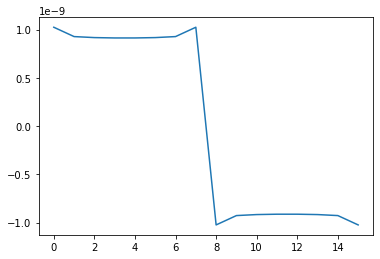

In [12]:
import matplotlib.pyplot as plt
plt.plot(rhos)
plt.show()

# Plot potential as a function of x where y = d/2  
ศักย์ไฟฟ้ายังไม่เรียบคงที่ = -5 โวลท์ เพราะว่าเราแบ่งแผ่นโลหะเป็นชิ้นใหญ่เกินไป ต้องแบ่งให้ละเอียดมากขึ้น

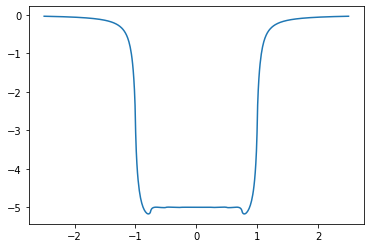

In [13]:
nn = 500
xx = np.linspace(-2.5, 2.5, nn)

vv = np.zeros(nn)
for ii in range(nn):
    for jj in range(n):
        vv[ii] = vv[ii]+rhos[jj]*potential(xy1[jj][0],xy1[jj][1],dx,xx[ii],d/2)
import matplotlib.pyplot as plt
plt.plot(xx,vv)
plt.show()
    

0-7 is on y =  -0.05  and 8-15 is on y =  0.05 .


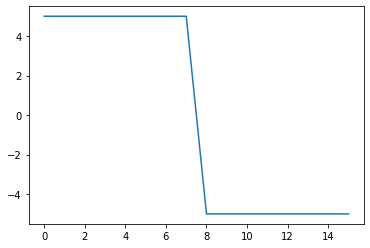

In [14]:
vv = np.matmul(z, rhos)
import matplotlib.pyplot as plt
print('0-7 is on y = ',-d/2, ' and 8-15 is on y = ',d/2, '.' )
plt.plot(vv)
plt.show()

# เพิ่มจำนวนชิ้น (nx) = 500

In [15]:
W = 2
d = 0.1
nx = 500
dx = W/nx
xx = np.linspace(-(W/2-dx/2), (W/2-dx/2), nx)
yy = np.array([-d/2, d/2])
xx1, yy1 = np.meshgrid(xx,yy)
m,n = xx1.shape
xy1 = []
#ตำแหน่งจุด x,y เป็นจุดกึ่งกลางของแต่ละชิ้นขอแผ่นตัวนำ เมื่อแบ่งแผ่นตัวนำเป็น nx ชิ้น
for ii in range(m):
    for jj in range(n):
        xy1.append([xx1[ii,jj],yy1[ii,jj]])

n = m*n
z = np.zeros((n,n))
#คำนวนศักย์ไฟฟ้าที่ตำแหน่งจุดกึ่งกลางของแต่ละชิ้น
for ii in range(n):
    for jj in range(n):
        z[jj,ii] = potential(xy1[ii][0],xy1[ii][1],dx,xy1[jj][0],xy1[jj][1])
#y < 0 => V = 5V ; y > 0 => V = -5
v = 5*np.ones((1,nx))
v = np.append(v,-5*np.ones((1,nx)))
# แก้สมการ Z rhos = v
rhos = np.linalg.solve(z,v)


# Plot ความหนาแน่นประจุ ใหม่  
เห็นว่าความหนาแน่นประจุ $\rho_s$ เรียบต่อเนื่องมากขึ้น

In [16]:
import matplotlib.pyplot as plt
plt.plot(rhos)
plt.show()